# Eine kleine Noncemusik
Noncesense Research Lab / Monero Archival Project

Feb 2019

Turning the time-dependent nonce distribution into music.

# Contributors
[NeptuneResearch](https://github.com/neptuneresearch),  [Isthmus](https://github.com/mitchellpkt)


Take a peek at the nonces

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import matplotlib.patches as patches
from copy import copy

## Import data Nonce

In [2]:
#df= pd.read_csv("../data/Blocks_alt_and_main_20190418.csv")
plot_alts = 0
data = pd.read_csv("../data/nonce-difficulty-1500000.csv")
data.head()

difficulty   height       nonce   timestamp
0   99795150438  1500000  2706726749  1517489351
1   99783354814  1500001  1079000424  1517489517
2   99709274306  1500002  2174764548  1517489551
3   99886467049  1500003  2686461817  1517489707
4  100119806561  1500004       12845  1517489729

## Plot the distribution of nonce values

Inspired by:

__Antoine Le Calvez__

@khannib https://twitter.com/khannib/status/1082280569449447424

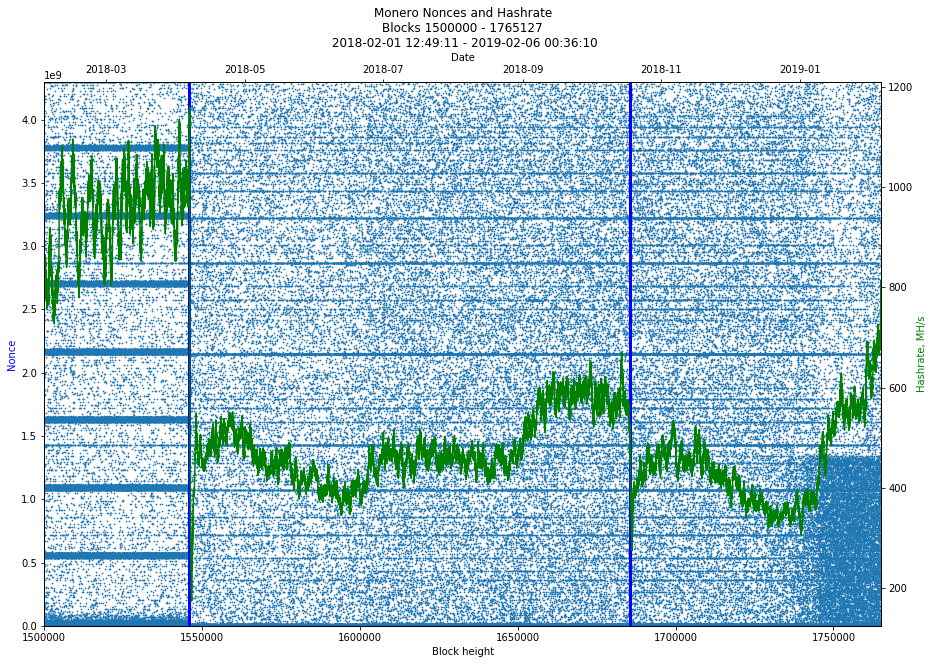

In [3]:
import datetime
plot_alts = 0
df = pd.read_csv("../data/nonce-difficulty-1500000.csv")

pow_v7_fork_height = 1546000
pow_v8_fork_height = 1685555
block_time_sec = 120

block_start = min(df.height)
block_end = max(df.height)
date_start = datetime.datetime.utcfromtimestamp(min(df.timestamp))
date_end = datetime.datetime.utcfromtimestamp(max(df.timestamp))

fig, ax = plt.subplots(figsize=(15, 10))
if plot_alts != 1:
    plt.scatter(df.height, df.nonce, s=0.5)
if plot_alts:
    color_att = 0.8
    tr_main = plt.scatter(df.height, df.nonce, c=(color_att,color_att,color_att), s=0.6)
    tr_alt = plt.scatter(alt_df.height, alt_df.nonce, c='r', s=6)
plt.title('Monero Nonces and Hashrate\nBlocks {} - {}\n {} - {}'.format(block_start, block_end, date_start, date_end))
plt.xlabel('Block height')
plt.ylabel('Nonce', color='blue')
plt.axvline(x=pow_v7_fork_height, c='blue', linewidth=3)
plt.axvline(x=pow_v8_fork_height, c='blue', linewidth=3)
ax.set_xlim(block_start, block_end)
ax.set_ylim(0, 2**32)

ax2 = ax.twinx()
hashrate_mh_s = df.difficulty*1e-6/block_time_sec
tr_hash = ax2.plot(df.height, hashrate_mh_s, 'green')
ax2.set_ylabel('Hashrate, MH/s', color='green')

ax3 = ax.twiny()
ax3.set_xlabel("Date")
ax3.set_xlim(date_start, date_end)

plt.show()

## Import audio libraries

In [4]:
import matplotlib.pyplot as plt;
from IPython.display import Audio;
import numpy as np;
import io;
import soundfile as sf;
import demosongs;
import pysynth_beeper;
import pysynth;
import pysynth_b;
import pysynth_c;
import pysynth_d;
import pysynth_e;
import pysynth_p;
import pysynth_s;

Piano key frequencies (for equal temperament):
Key number	Scientific name	Frequency (Hz)
         1	             A0	         27.50
         2	            A#0	         29.14
         3	             B0	         30.87
         4	             C1	         32.70
         5	            C#1	         34.65
         6	             D1	         36.71
         7	            D#1	         38.89
         8	             E1	         41.20
         9	             F1	         43.65
        10	            F#1	         46.25
        11	             G1	         49.00
        12	            G#1	         51.91
        13	             A1	         55.00
        14	            A#1	         58.27
        15	             B1	         61.74
        16	             C2	         65.41
        17	            C#2	         69.30
        18	             D2	         73.42
        19	            D#2	         77.78
        20	             E2	         82.41
        21	             F2	         87.31
        22	            F#2	  

In [5]:
notes = pd.read_csv('notefile.csv')
notes.head()

index note   freq
0      1   A0  27.50
1      2  A#0  29.14
2      3   B0  30.87
3      4   C1  32.70
4      5  C#1  34.65

## First, show with a demo song

In [6]:
ss = demosongs.song4_rh
speed_coeff = 2
song = [(s[0].lower(), s[1]*speed_coeff) for s in ss]
song[0:10]

[('e', 16),
 ('f#', 16),
 ('g*', 8),
 ('f#', 16),
 ('e', 16),
 ('d#*', 8),
 ('e', 16),
 ('f#', 16),
 ('b3*', 8),
 ('c#', 16)]

In [7]:
buffer = io.BytesIO()

pysynth_s.make_wav(song, fn=buffer)

buffer.seek(0)

#wav = buffer.getvalue()
data, samplerate = sf.read(buffer)

[1/52]	
[5/52]	
[9/52]	
[13/52]	
[17/52]	
[21/52]	
[25/52]	
[29/52]	
[33/52]	
[37/52]	
[41/52]	
[45/52]	
[49/52]	
Writing to file <_io.BytesIO object at 0x7f2d6adc7af0>



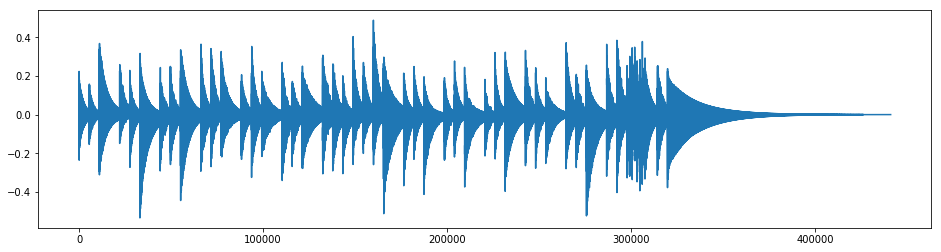

In [8]:
plt.figure(figsize=(16,4))
plt.plot(data)

In [9]:
Audio(data, rate=samplerate)

## Now construct the nonce music

In [10]:
note_duration = 32
min_freq = min(notes.freq)
max_freq = max(notes.freq)
freq_range = max_freq - min_freq
piano_keys = 87
max_nonce = 2**32

notes.head()

index note   freq
0      1   A0  27.50
1      2  A#0  29.14
2      3   B0  30.87
3      4   C1  32.70
4      5  C#1  34.65

In [11]:
nonce_track = df.nonce[0:100]
nonce_keys = copy(list(nonce_track))
counter = 0
for nonce in nonce_track:
    scaled_nonce = round(nonce/max_nonce*piano_keys)
    nonce_keys[counter] = notes.note[scaled_nonce]
    counter = counter + 1
    # print('***')
    # print(nonce)
    # print(scaled_nonce)
    # print(notes.note[scaled_nonce])

In [12]:
nonce_song = [(k.lower(), note_duration) for k in nonce_keys]
buffer = io.BytesIO()
pysynth_s.make_wav(nonce_song, fn=buffer)
buffer.seek(0)
#wav = buffer.getvalue()
data, samplerate = sf.read(buffer)

[1/100]	
[5/100]	
[9/100]	
[13/100]	
[17/100]	
[21/100]	
[25/100]	
[29/100]	
[33/100]	
[37/100]	
[41/100]	
[45/100]	
[49/100]	
[53/100]	
[57/100]	
[61/100]	
[65/100]	
[69/100]	
[73/100]	
[77/100]	
[81/100]	
[85/100]	
[89/100]	
[93/100]	
[97/100]	
Writing to file <_io.BytesIO object at 0x7f2d6add7518>



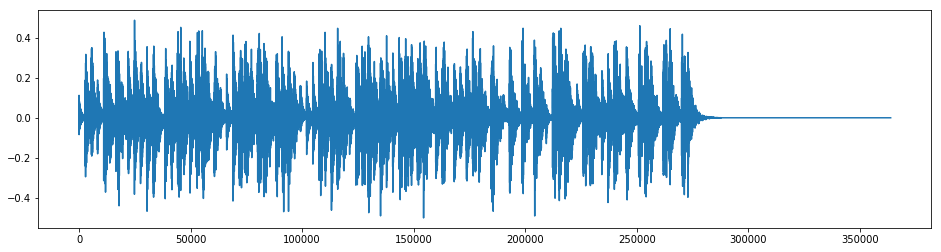

In [13]:
plt.figure(figsize=(16,4))
plt.plot(data)

In [14]:
Audio(data, rate=samplerate)

## Let's make a version without the search upward from bottom strategy

[1/999]	
[5/999]	
[9/999]	
[13/999]	
[17/999]	
[21/999]	
[25/999]	
[29/999]	
[33/999]	
[37/999]	
[41/999]	
[45/999]	
[49/999]	
[53/999]	
[57/999]	
[61/999]	
[65/999]	
[69/999]	
[73/999]	
[77/999]	
[81/999]	
[85/999]	
[89/999]	
[93/999]	
[97/999]	
[101/999]	
[105/999]	
[109/999]	
[113/999]	
[117/999]	
[121/999]	
[125/999]	
[129/999]	
[133/999]	
[137/999]	
[141/999]	
[145/999]	
[149/999]	
[153/999]	
[157/999]	
[161/999]	
[165/999]	
[169/999]	
[173/999]	
[177/999]	
[181/999]	
[185/999]	
[189/999]	
[193/999]	
[197/999]	
[201/999]	
[205/999]	
[209/999]	
[213/999]	
[217/999]	
[221/999]	
[225/999]	
[229/999]	
[233/999]	
[237/999]	
[241/999]	
[245/999]	
[249/999]	
[253/999]	
[257/999]	
[261/999]	
[265/999]	
[269/999]	
[273/999]	
[277/999]	
[281/999]	
[285/999]	
[289/999]	
[293/999]	
[297/999]	
[301/999]	
[305/999]	
[309/999]	
[313/999]	
[317/999]	
[321/999]	
[325/999]	
[329/999]	
[333/999]	
[337/999]	
[341/999]	
[345/999]	
[349/999]	
[353/999]	
[357/999]	
[361/999]	
[365/999]	
[369/999]	
[373/

Text(0, 0.5, 'nonce value')

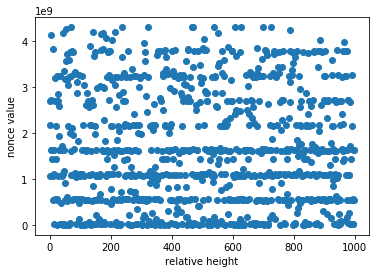

In [15]:
note_duration = 128
first_n_notes = 1000
nonce_threshold = 10**7
nonce_track = df.nonce[df.nonce>nonce_threshold]
nonce_track = nonce_track[1:first_n_notes]
nonce_keys = copy(list(nonce_track))
counter = 0
for nonce in nonce_track:
    scaled_nonce = round(nonce/max_nonce*piano_keys)
    nonce_keys[counter] = notes.note[scaled_nonce]
    counter = counter + 1
    # print('***')
    # print(nonce)
    # print(scaled_nonce)
    # print(notes.note[scaled_nonce])

nonce_song = [(k.lower(), note_duration) for k in nonce_keys]
buffer = io.BytesIO()
pysynth_b.make_wav(nonce_song, fn=buffer)
buffer.seek(0)
#wav = buffer.getvalue()
data, samplerate = sf.read(buffer)

plt.scatter(range(len(nonce_track)), nonce_track)
plt.xlabel('relative height')
plt.ylabel('nonce value')

In [16]:
Audio(data, rate=samplerate)

## And now the recent stretch


Text(0, 0.5, 'nonce value')

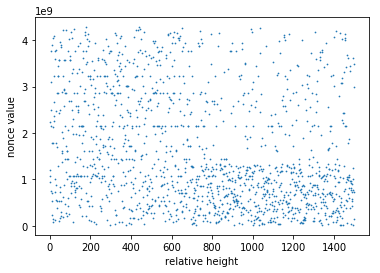

In [17]:
note_duration = 128
last_n_notes = 30000
nonce_threshold = 2*10**7
nonce_track_raw = df.nonce[df.nonce>nonce_threshold]
nonce_track_raw = nonce_track_raw[(len(nonce_track_raw)-last_n_notes):len(nonce_track_raw)]
nonce_track = nonce_track_raw[::20]

plt.scatter(range(len(nonce_track)), nonce_track,s=0.5)
plt.xlabel('relative height')
plt.ylabel('nonce value')

In [18]:
note_duration = 128
nonce_keys = copy(list(nonce_track))
counter = 0
for nonce in nonce_track:
    scaled_nonce = round(nonce/max_nonce*piano_keys)
    nonce_keys[counter] = notes.note[scaled_nonce]
    counter = counter + 1
    # print('***')
    # print(nonce)
    # print(scaled_nonce)
    # print(notes.note[scaled_nonce])

nonce_song = [(k.lower(), note_duration) for k in nonce_keys]
buffer = io.BytesIO()
pysynth_b.make_wav(nonce_song, fn=buffer)
buffer.seek(0)
#wav = buffer.getvalue()
data, samplerate = sf.read(buffer)

[1/1500]	
[5/1500]	
[9/1500]	
[13/1500]	
[17/1500]	
[21/1500]	
[25/1500]	
[29/1500]	
[33/1500]	
[37/1500]	
[41/1500]	
[45/1500]	
[49/1500]	
[53/1500]	
[57/1500]	
[61/1500]	
[65/1500]	
[69/1500]	
[73/1500]	
[77/1500]	
[81/1500]	
[85/1500]	
[89/1500]	
[93/1500]	
[97/1500]	
[101/1500]	
[105/1500]	
[109/1500]	
[113/1500]	
[117/1500]	
[121/1500]	
[125/1500]	
[129/1500]	
[133/1500]	
[137/1500]	
[141/1500]	
[145/1500]	
[149/1500]	
[153/1500]	
[157/1500]	
[161/1500]	
[165/1500]	
[169/1500]	
[173/1500]	
[177/1500]	
[181/1500]	
[185/1500]	
[189/1500]	
[193/1500]	
[197/1500]	
[201/1500]	
[205/1500]	
[209/1500]	
[213/1500]	
[217/1500]	
[221/1500]	
[225/1500]	
[229/1500]	
[233/1500]	
[237/1500]	
[241/1500]	
[245/1500]	
[249/1500]	
[253/1500]	
[257/1500]	
[261/1500]	
[265/1500]	
[269/1500]	
[273/1500]	
[277/1500]	
[281/1500]	
[285/1500]	
[289/1500]	
[293/1500]	
[297/1500]	
[301/1500]	
[305/1500]	
[309/1500]	
[313/1500]	
[317/1500]	
[321/1500]	
[325/1500]	
[329/1500]	
[333/1500]	
[337/1500]	
[341/150

In [19]:
Audio(data, rate=samplerate)